In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
import librosa
import librosa.display

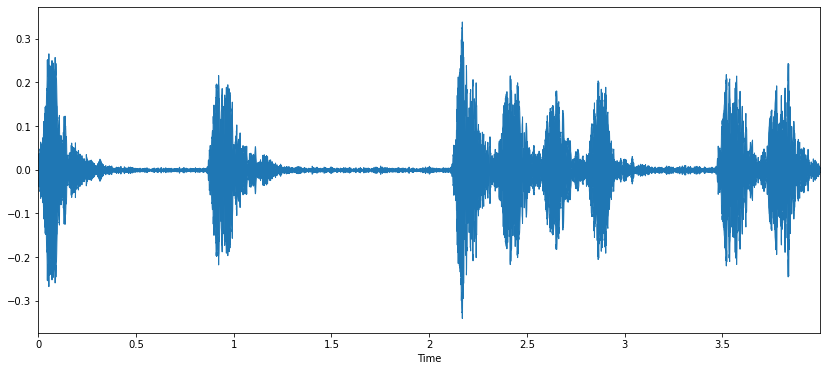

In [24]:
## Example Sound Checked below
plt.figure(figsize=(14,6))
data,sampleRate = librosa.load('dogBark.wav')
librosa.display.waveplot(data,sr = sampleRate)
ipd.Audio('dogBark.wav')

In [25]:
sampleRate

22050

In [26]:
data

array([ 0.01670339,  0.02311585,  0.01839567, ..., -0.00195783,
       -0.00164373, -0.00170631], dtype=float32)

In [27]:
len(data)

88200

In [28]:
import pandas as pd
metadata = pd.read_csv("UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

In [29]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [30]:
metadata['class'].value_counts()

air_conditioner     1000
engine_idling       1000
street_music        1000
dog_bark            1000
drilling            1000
jackhammer          1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [31]:
from scipy.io import wavfile as wav
wave_sample,wave_audio = wav.read('dogBark.wav')

In [32]:
wave_audio

array([[ 233, 1268],
       [ 188, 1253],
       [ 161, 1235],
       ...,
       [-403,  291],
       [-414,  313],
       [-435,  326]], dtype=int16)

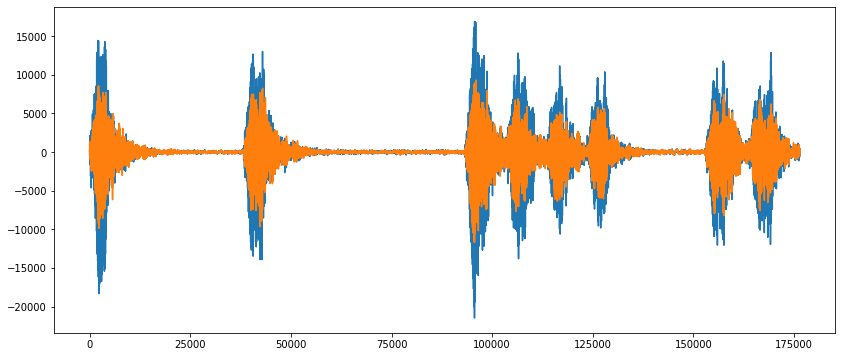

In [33]:
plt.figure(figsize=(14,6))
plt.plot(wave_audio)

In [34]:
import os

In [40]:
audio_path = 'UrbanSound8K/UrbanSound8K/audio'
metadata = pd.read_csv("UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [41]:
def feature_extractor(files):
    audio, sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [43]:
from tqdm import tqdm 
import numpy as np

extracted_features=[]

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    final_class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:39,  9.05it/s]c:\users\sajal\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [12:54, 15.68it/s]c:\users\sajal\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [12:54, 19.00it/s]c:\users\sajal\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [13:31, 10.76it/s]


In [47]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [48]:
X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [50]:
X.shape

(8732, 40)

In [51]:
y = np.array(pd.get_dummies(y))

In [52]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
## Train_test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [55]:
X_test.shape


(2620, 40)

In [56]:
X_train.shape


(6112, 40)

In [58]:
y_train.shape


(6112, 10)

In [59]:
y_test.shape

(2620, 10)

In [60]:
import tensorflow as tf


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [62]:
num_labels = y.shape[1]

In [69]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [71]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
191/191 [==============================] - 3s 9ms/step - loss: 14.3981 - accuracy: 0.1150 - val_loss: 2.2922 - val_accuracy: 0.1164

Epoch 00001: val_loss improved from inf to 2.29223, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
191/191 [==============================] - 1s 3ms/step - loss: 2.7643 - accuracy: 0.1235 - val_loss: 2.2826 - val_accuracy: 0.1141

Epoch 00002: val_loss improved from 2.29223 to 2.28261, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
191/191 [==============================] - 1s 3ms/step - loss: 2.4191 - accuracy: 0.1237 - val_loss: 2.2722 - val_accuracy: 0.1202

Epoch 00003: val_loss improved from 2.28261 to 2.27216, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
191/191 [==============================] - 1s 3ms/step - loss: 2.3247 - accuracy: 0.1239 - val_loss: 2.2603 - val_accuracy: 0.1252

Epoch 00004: val_loss improved from 2.27216 to 2.26030, saving model to saved_models\audio_cla

In [73]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy)

[0.8424500226974487, 0.7366412281990051]
